In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


In [2]:
airline=pd.read_csv("EastWestAirlines.csv")
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
#normalizatin function min max
def norm_func(i):
    x=(i-i.min())/(i-i.max()-(i-i.min()))
    return (x)

In [4]:
airline_norm=norm_func(airline.iloc[:,1:])
airline_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.016508,-0.0,-0.00,-0.0,-0.0,-0.000660,-0.011628,-0.000000,-0.000000,-0.843742,-0.0
1,-0.011288,-0.0,-0.00,-0.0,-0.0,-0.000815,-0.023256,-0.000000,-0.000000,-0.839884,-0.0
2,-0.024257,-0.0,-0.00,-0.0,-0.0,-0.015636,-0.046512,-0.000000,-0.000000,-0.847842,-0.0
3,-0.008667,-0.0,-0.00,-0.0,-0.0,-0.001896,-0.011628,-0.000000,-0.000000,-0.837955,-0.0
4,-0.057338,-0.0,-0.75,-0.0,-0.0,-0.164211,-0.302326,-0.067398,-0.075472,-0.835905,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.010837,-0.0,-0.00,-0.0,-0.0,-0.032330,-0.046512,-0.006490,-0.018868,-0.168917,-1.0
3995,-0.037766,-0.0,-0.00,-0.0,-0.0,-0.003720,-0.058140,-0.000000,-0.000000,-0.167953,-1.0
3996,-0.043169,-0.0,-0.50,-0.0,-0.0,-0.096505,-0.093023,-0.000000,-0.000000,-0.168797,-1.0
3997,-0.032202,-0.0,-0.00,-0.0,-0.0,-0.001896,-0.011628,-0.016225,-0.018868,-0.168676,-0.0


Hierarchical clustering

In [5]:
#creating cluster
airline_c = AgglomerativeClustering(n_clusters=4,affinity='euclidean', linkage='single')
airline_c

AgglomerativeClustering(linkage='single', n_clusters=4)

In [6]:
#save clusters for chart
airline_nc = airline_c.fit_predict(airline_norm)
airline_nc


array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [7]:
Clusters=pd.DataFrame(airline_nc,columns=['Cluster_hi'])
Clusters

,Cluster_hi
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [40]:
from scipy.cluster.hierarchy import linkage
airline_l=linkage(airline_norm,method="complete",metric="euclidean")

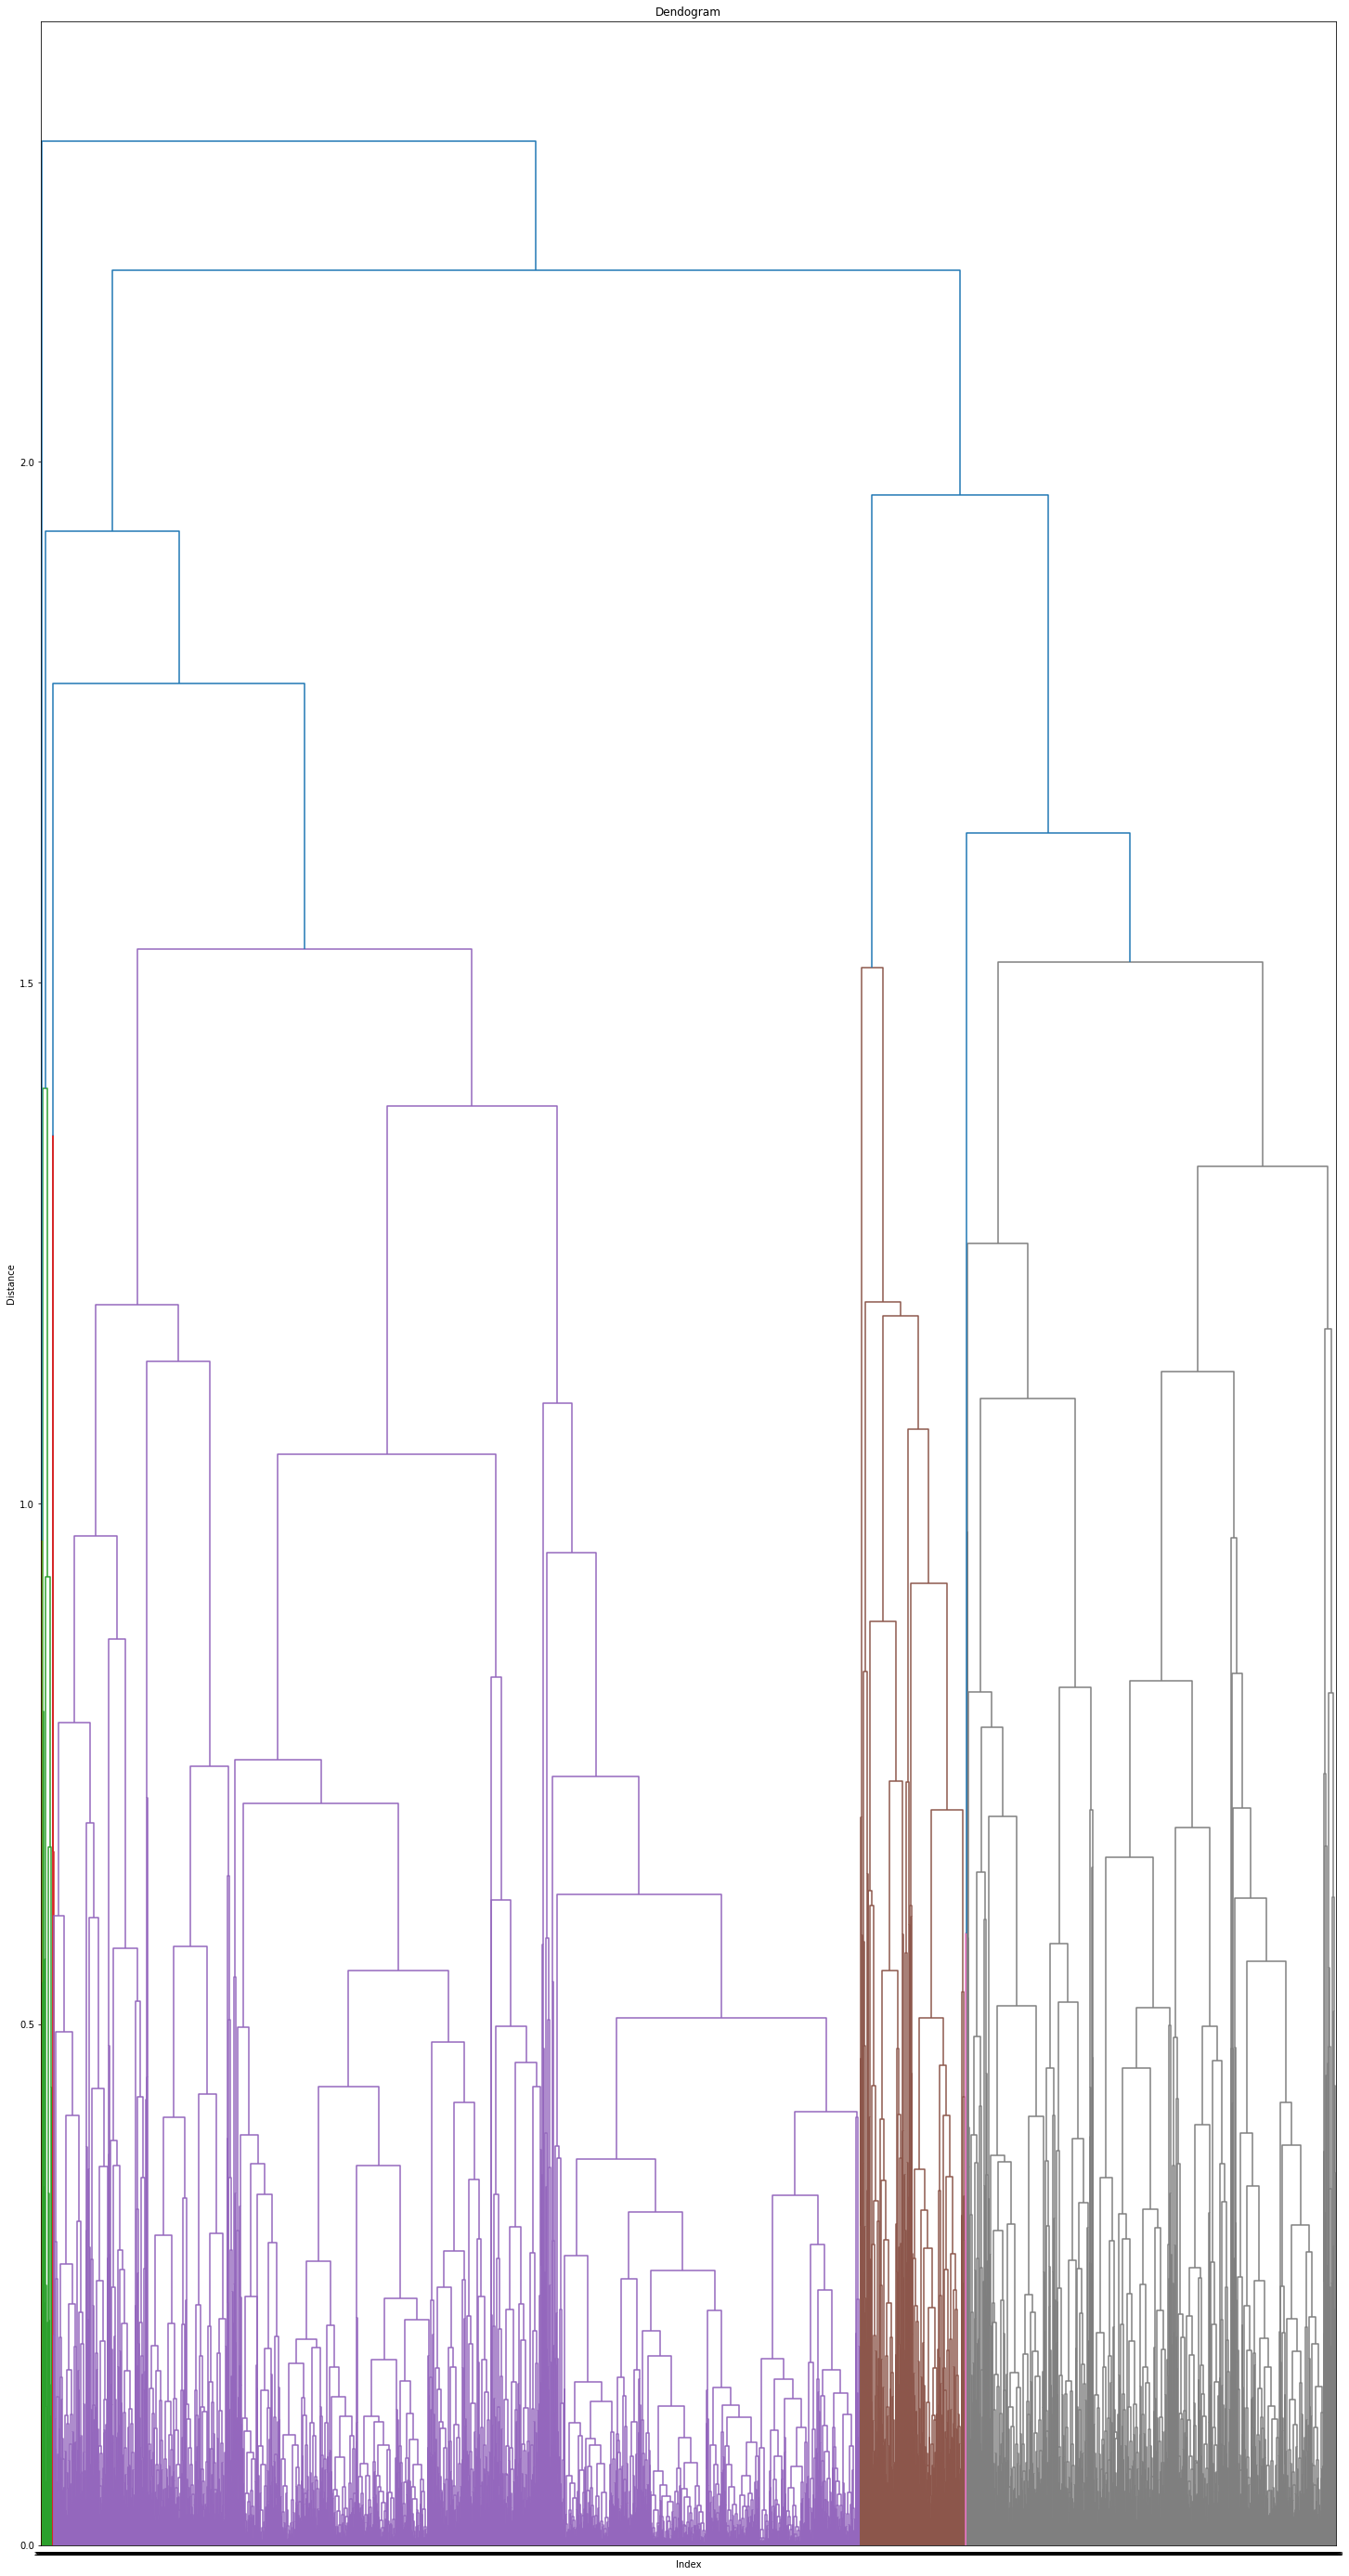

In [41]:
plt.figure(figsize=(25,50));plt.title("Dendogram");plt.xlabel("Index");plt.ylabel("Distance")
sch.dendrogram(airline_l,leaf_rotation=0.,leaf_font_size=6.,)
plt.show()